In [1]:
%pylab inline
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

Populating the interactive namespace from numpy and matplotlib


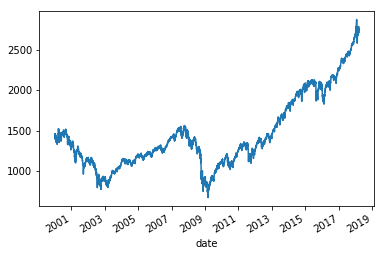

In [2]:
ts = TimeSeries(key="RL0YBD0NPUE3QYQ6", output_format="pandas")
sp500, _ = ts.get_daily("SPX", outputsize="full")
sp500.index = pd.to_datetime(sp500.index)
col_mapping = {
    "5. volume": "Volume",
    "4. close": "Close",
    "2. high": "High",
    "1. open": "Open",
    "3. low": "Low"
}
sp500.rename(col_mapping, axis="columns", inplace=True)
sp500.head()

sp500.Close.plot()
plt.show()

In [3]:
import urllib2
import lxml.html as LH

slick = urllib2.urlopen("https://www.slickcharts.com/sp500")
html = slick.read()

slick_content = LH.fromstring(html)
table = slick_content.get_element_by_id("example-1")
data = [[cell.forms[0].form_values()[0][1] if j==2 else cell.text_content() for j, cell in enumerate(tr.xpath('td'))] for tr in table.xpath('//tr')]

sp500_details = pd.DataFrame(data[1:], columns=[cell.text_content() for cell in tr.xpath('//th') for tr in table.xpath('//thead/tr')])
sp500_details.Weight = sp500_details["Rank Weight".split()].applymap(eval)
sp500_details.set_index("Rank", drop=True, inplace=True)
sp500_details.head()

,Company,Symbol,Weight
Rank,,,
1,Apple Inc.,AAPL,1.0
2,Microsoft Corporation,MSFT,2.0
3,Amazon.com Inc.,AMZN,3.0
4,Facebook Inc. Class A,FB,4.0
5,Berkshire Hathaway Inc. Class B,BRK.B,5.0


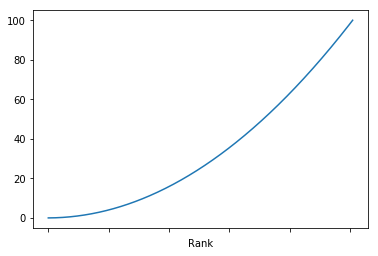

In [4]:
weights = sp500_details.Weight/sp500_details.Weight.sum()*100.
weights.cumsum().plot()